In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
# Load do Dataset
df = sns.load_dataset(name='penguins')

In [3]:
# Visualizando o dataset
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [4]:
# Verificando dimensões
df.shape

(344, 7)

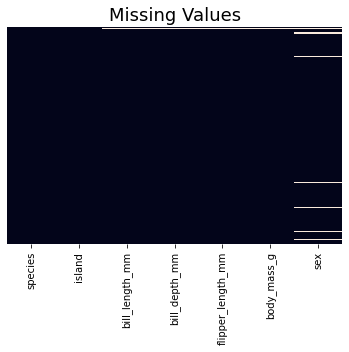

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [5]:
# Verificar valores nulos
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values', size=18)
plt.show()
print(df.info())

In [6]:
# Removendo valores nulos
df.dropna(inplace=True)

In [7]:
# Transformando variáveis categóricas
df1 = pd.get_dummies(df, drop_first=True)

In [8]:
df1.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0


In [9]:
# Importar metrica
from sklearn.feature_selection import chi2

In [10]:
# Split dataset
X = df1.drop('sex_Male', axis=1)
y = df1.sex_Male

In [11]:
# Normalizando X
Xs = scale(X)
Xs = Xs**2

In [12]:
# Calculando Chi-Squared
chi_scores = chi2(Xs,y)

In [13]:
# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

In [14]:
# Results
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

,Chi2,p-Value
bill_length_mm,1.986948,0.158660
bill_depth_mm,0.287287,0.591965
flipper_length_mm,6.469398,0.010975
body_mass_g,5.849896,0.015578
species_Chinstrap,0.014937,0.902726
species_Gentoo,0.017226,0.895579
island_Dream,0.000044,0.994698
island_Torgersen,0.213312,0.644184


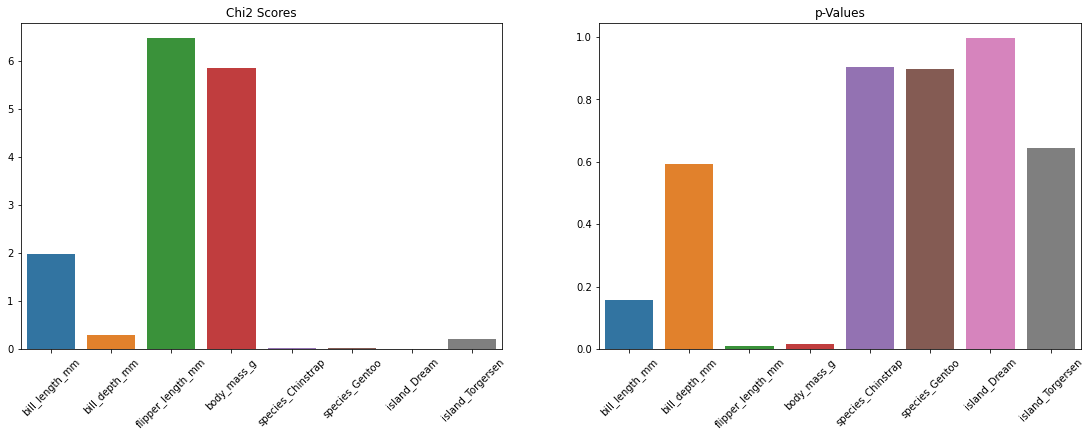

In [15]:
# Dividindo o plot em duas colunas e tamanho da figura
fig, ax = plt.subplots(1,2, figsize=(19,6))

# Plot 1 - Chi2 scores
g = sns.barplot(x=scores.index, y=scores, ax= ax[0])
g.set_xticklabels(scores.index, rotation=45)
g.set_title('Chi2 Scores')

# Plot 2 p-Values
g2 = sns.barplot(x=pvalues.index, y=pvalues, ax= ax[1])
g2.set_xticklabels(pvalues.index, rotation=45)
g2.set_title('p-Values');

Como resultado, temos que os **menores Chi2 scores/ maiores p-Values** são os atributos menos dependentes da variável target Sexo. 

Portanto, temos que a espécie (species) e a ilha onde habitam (island) são independentes do sexo do animal, não influenciando em uma possível previsão.
Isso faz todo o sentido, dado que em todas as ilhas e em todas as espécies, teremos os dois sexos de pinguins, sendo muito difícil prever essa variável com apenas essa informação.

---

## ANOVA F Test

ANOVa (Analysis of Variance) é um teste estatístico que calcula a variância entre as médias de grupos de dados. A Ho (p-value alto) é de que os grupos tem a mesma variância e, portanto, não tem impacto para treinamento de modelo. Halt (p-value baixo) de que existe diferença significativa e o atributo é bom para treinamento de modelo.

In [15]:
# Importando library
import pingouin as pg

In [16]:
df1.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_Male'],
      dtype='object')

In [17]:
df1['sex_Male'] = df1.sex_Male.astype(int)

In [47]:
# Calculando a estatística com ANOVA
aov = []
for variance in df1.columns[:8]:
  v = pg.anova(data=df1, dv='sex_Male', between=variance, detailed=True).round(3)
  aov.append(v)

In [64]:
pd.concat(aov)

,Source,SS,DF,MS,F,p-unc,np2
0,bill_length_mm,53.519,162,0.330,1.889,0.000,0.643
1,Within,29.724,170,0.175,NaN,NaN,NaN
0,bill_depth_mm,42.777,78,0.548,3.442,0.000,0.514
1,Within,40.466,254,0.159,NaN,NaN,NaN
0,flipper_length_mm,26.592,53,0.502,2.471,0.000,0.319
1,Within,56.651,279,0.203,NaN,NaN,NaN
0,body_mass_g,43.097,92,0.468,2.800,0.000,0.518
1,Within,40.146,240,0.167,NaN,NaN,NaN
0,species_Chinstrap,0.002,1,0.002,0.007,0.934,0.000
1,Within,83.242,331,0.251,NaN,NaN,NaN


Verificando o resultado das análises de variância, chegamos ao mesmo resultado. As variáveis mais relevantes para construção de um modelo seriam **bill_depth, body_mass_g, Flipper_length e bill_length**, sendo as espécies e ilhas onde eles vivem menos relevantes para prever o sexo do animal.